In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!apt-get -qq install -y tree

Selecting previously unselected package tree.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
import keras, os, pickle
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import pylab as pl
import seaborn as sns

In [ ]:
!tree '/content/gdrive/My Drive/dz6' -d ##four languages: German (de), English (en), Greek (gr), Russian (ru)

/content/gdrive/My Drive/dz6
├── saveb
├── saved
├── test
│   ├── de
│   ├── en
│   ├── gr
│   └── ru
├── test2
│   ├── de
│   ├── en
│   ├── gr
│   └── ru
├── train
│   ├── de
│   ├── en
│   ├── gr
│   └── ru
└── train2
    ├── de
    ├── en
    ├── gr
    └── ru

22 directories


In [ ]:
train_dir = '/content/gdrive/My Drive/dz6/train/'
test_dir = '/content/gdrive/My Drive/dz6/test/'

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized
        target_size=(150, 150),
        batch_size=40,
        # Since we use sparse_categorical_crossentropy loss, we need sparse labels
        class_mode='sparse',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='sparse',
        shuffle=False)

Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (40, 150, 150, 3)
labels batch shape: (40,)


In [ ]:
##import pickle
checkpoint = keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/dz6/languages{epoch:01d}.h5')  
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=20,
      callbacks=[checkpoint],
      validation_data=test_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
8/8 [==============================] - 163s 20s/step - loss: 1.8523 - acc: 0.1250 - val_loss: 1.3778 - val_acc: 0.2500
Epoch 2/20
8/8 [==============================] - 19s 2s/step - loss: 1.4732 - acc: 0.1250 - val_loss: 1.3739 - val_acc: 0.4625
Epoch 3/20
8/8 [==============================] - 19s 2s/step - loss: 1.4462 - acc: 0.2313 - val_loss: 1.3747 - val_acc: 0.2500
Epoch 4/20
8/8 [==============================] - 19s 2s/step - loss: 1.4401 - acc: 0.1250 - val_loss: 1.3671 - val_acc: 0.6625
Epoch 5/20
8/8 [==============================] - 19s 2s/step - loss: 1.4092 - acc: 0.1000 - val_loss: 1.3606 - val_acc: 0.6875
Epoch 6/20
8/8 [==============================] - 19s 2s/step - loss: 1.3925 - acc: 0.2438 - val_loss: 1.3495 - val_acc: 0.4000
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 1.3808 - acc: 0.2937 - val_loss: 1.3310 - val_acc: 0.3500
Epoch 8/20
8/8 [==========

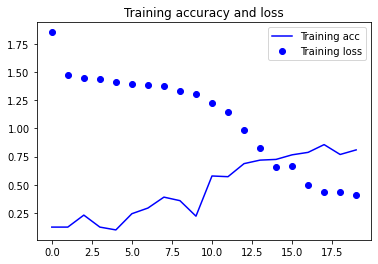

In [ ]:
plt.plot(range(len(history.history['acc'])), history.history['acc'], 'b', label='Training acc')
plt.plot(range(len(history.history['loss'])), history.history['loss'], 'bo', label='Training loss')
plt.title('Training accuracy and loss')
plt.legend()
plt.show()

In [ ]:
for a in range(20):
  model.load_weights('/content/gdrive/My Drive/dz6/languages'+str(a+1)+'.h5')
  scores = model.evaluate_generator(test_generator)
  print(a+1, "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
1 acc: 25.00%
2 acc: 46.25%
3 acc: 25.00%
4 acc: 66.25%
5 acc: 68.75%
6 acc: 40.00%
7 acc: 35.00%
8 acc: 60.00%
9 acc: 47.50%
10 acc: 52.50%
11 acc: 50.00%
12 acc: 91.25%
13 acc: 78.75%
14 acc: 57.50%
15 acc: 70.00%
16 acc: 82.50%
17 acc: 82.50%
18 acc: 73.75%
19 acc: 88.75%
20 acc: 88.75%


In [ ]:
model.load_weights('/content/gdrive/My Drive/dz6/languages12.h5')
scores = model.evaluate_generator(test_generator)
scores[1]*100

91.25000238418579

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


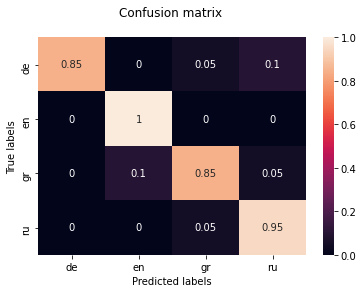

In [ ]:
cm=confusion_matrix(test_generator.classes, model.predict_classes(test_generator),normalize='true')
figure = pl.figure() 
axes = figure.add_subplot(111)
sns.heatmap(cm, annot=True, ax = axes);
axes.set_xlabel('Predicted labels');axes.set_ylabel('True labels'); 
axes.set_xticklabels(['de', 'en', 'gr', 'ru']) 
axes.set_yticklabels(['de', 'en', 'gr', 'ru']) 
pl.title('Confusion matrix \n')
pl.show()